## In this exercise, you can try applying a color threshold in the HLS color space. If you have any problems with the implementation, please refer to the previous video and instructor notes.

Your task here is to write a function that takes in an image and threshold values and returns a binary output from applying the threshold to the S-channel. Apply your thresholds as you did for gradients but this time use an exclusive (>) lower bound and an inclusive upper bound (<=).

You can download the test images in the quiz for local usage here.

file colorspace_test_images\test1.jpg



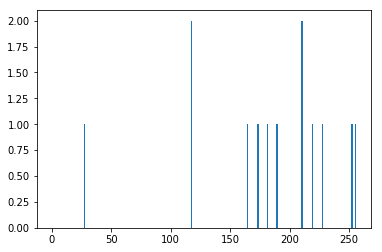

file colorspace_test_images\test4.jpg



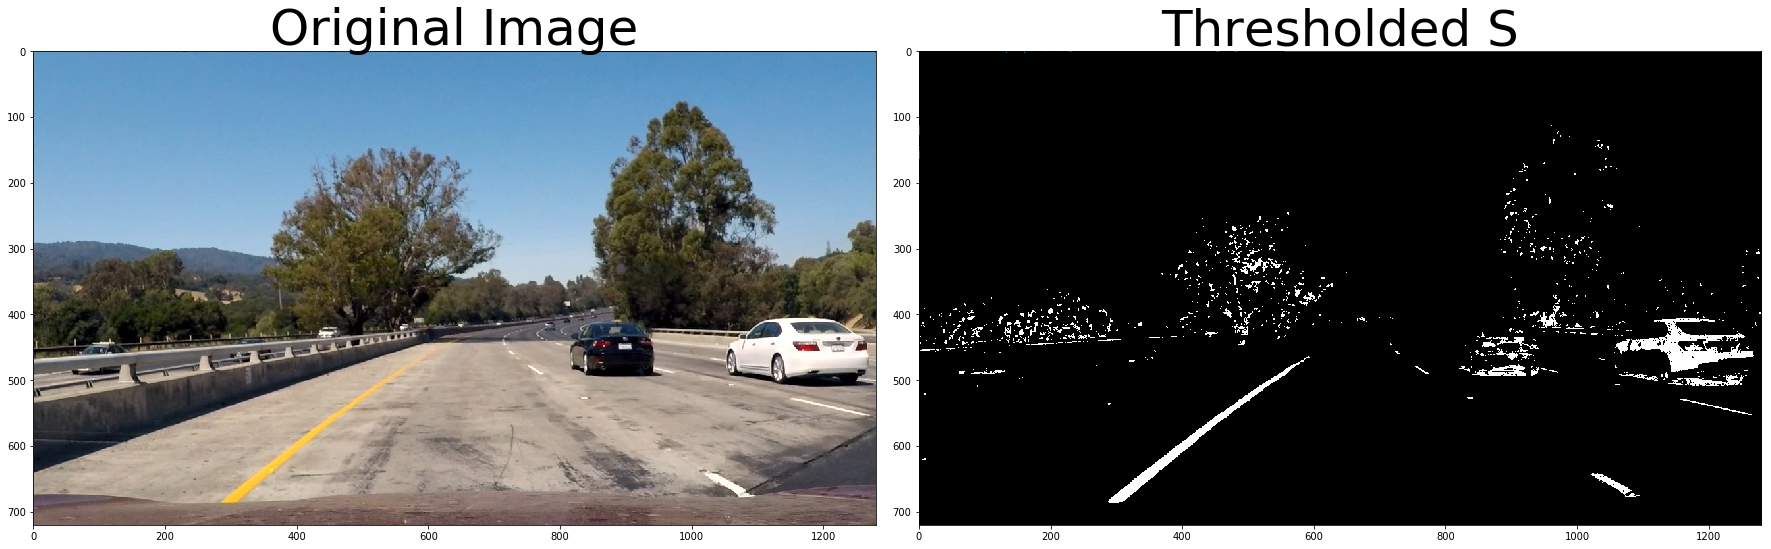

file colorspace_test_images\test6.jpg



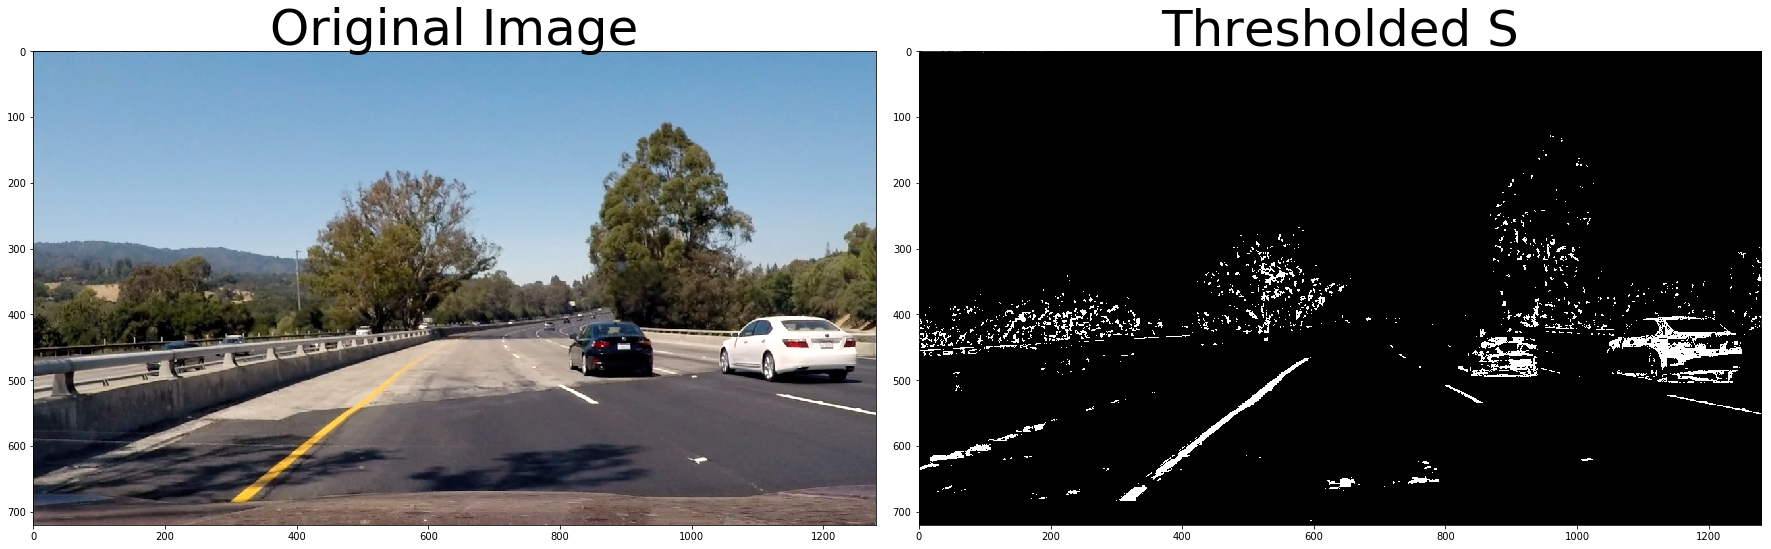

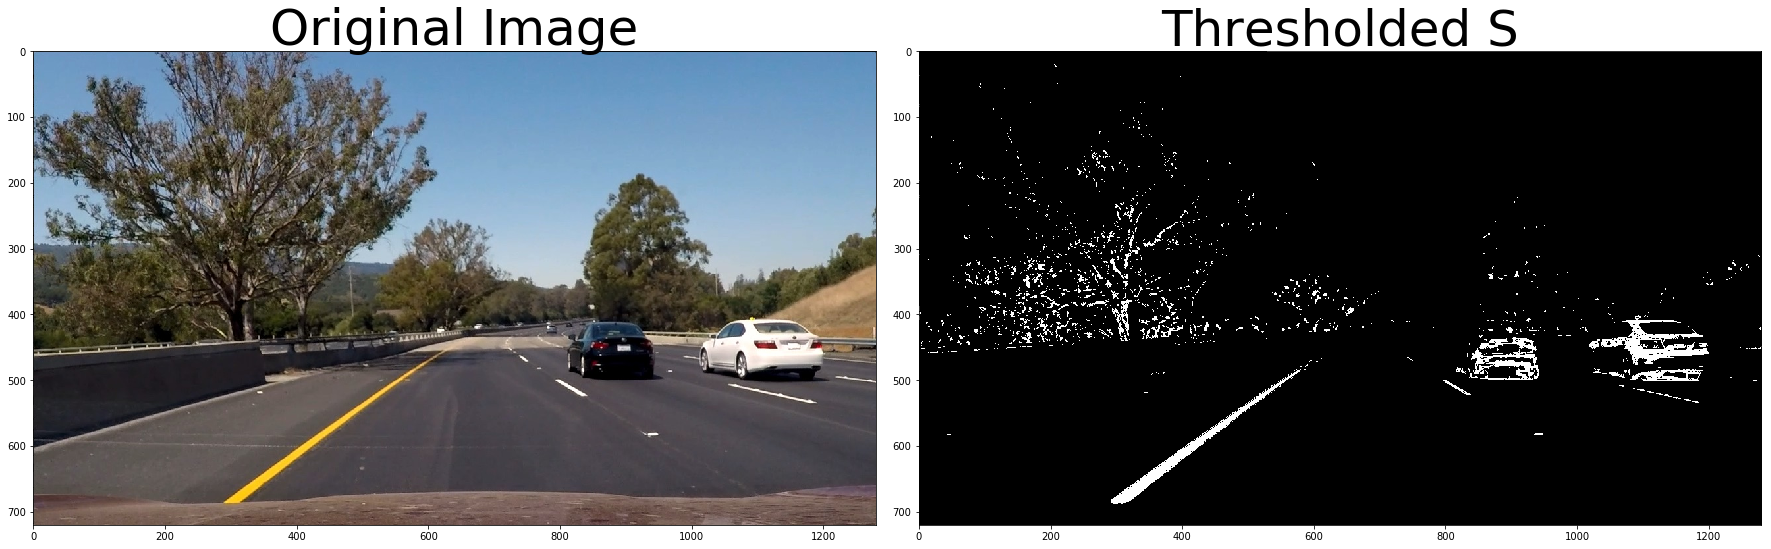

In [8]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import cv2
import glob, os
 

# Define a function that thresholds the S-channel of HLS
# Use exclusive lower bound (>) and inclusive upper (<=)
def hls_select(img, thresh=(0, 255)):
    # 1) Convert to HLS color space
    hls = cv2.cvtColor(img,cv2.COLOR_RGB2HLS)
    # 2) Apply a threshold to the S channel
    S = hls[:,:,2]
    print()
    # 3) Return a binary image of threshold result
    binary = np.zeros_like(S)
    binary[(S > thresh[0]) & (S <= thresh[1])] = 1
    binary_output = np.copy(binary) # placeholder line
    return binary_output


# Read in an image, you can also try test1.jpg or test4.jpg
for file in glob.glob("colorspace_test_images\*.jpg"):
    print("file",file)
    image = mpimg.imread(file)
    hls_binary = hls_select(image, thresh=(150, 255))
    hist = cv2.calcHist([image],[2],None,[256],[0,256])
    plt.hist(hist.ravel(),256,[0,256]); plt.show()

    # Plot the result
    f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
    f.tight_layout()
    ax1.imshow(image)
    ax1.set_title('Original Image', fontsize=50)
    ax2.imshow(hls_binary, cmap='gray')
    ax2.set_title('Thresholded S', fontsize=50)
    plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)


